# 2021/11/1
# 本代码绘制逐侯的MSE演变，层次为850

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# 计算成pentad平均并储存

In [2]:
#path1  =  "/home/sun/data/merra2_specific/"
#f0     =  xr.open_dataset(path1+"0227.climate_specific_humidity.nc")
#f1     =  xr.open_dataset("/home/sun/data/merra2_climate_year_mse.nc")
#file_list  =  os.listdir(path1)  ;  file_list.sort()
#
## 处理成侯平均
#pentad_mse  =  np.zeros((73,f0.specific_humidity.data.shape[0],f0.specific_humidity.data.shape[1],f0.specific_humidity.data.shape[2]))
#for pp in range(0,73):
#    pentad_mse[pp,:]  +=  np.average(f1.mse.data[pp*5:pp*5+5,:],axis=0)
#
#ncfile  =  xr.Dataset(
#    {
#        "mse": (["time", "lev","lat", "lon"], pentad_mse),
#    },
#    coords={
#        "lon": (["lon"], f0.lon.data),
#        "lat": (["lat"], f0.lat.data),
#        "lev": (["lev"], f0.lev.data),
#        "time": (["time"], np.linspace(1,73,73)),
#    },
#)
#ncfile["lat"].attrs  =  f0["lat"].attrs
#ncfile["lon"].attrs  =  f0["lon"].attrs
#ncfile["lev"].attrs  =  f0["lev"].attrs
#ncfile["mse"].attrs["units"]  =  "kj/kg"
#
#ncfile.to_netcdf("/home/sun/data/merra2_climate_pentad_mse.nc")

# 读取850hPa进行画图


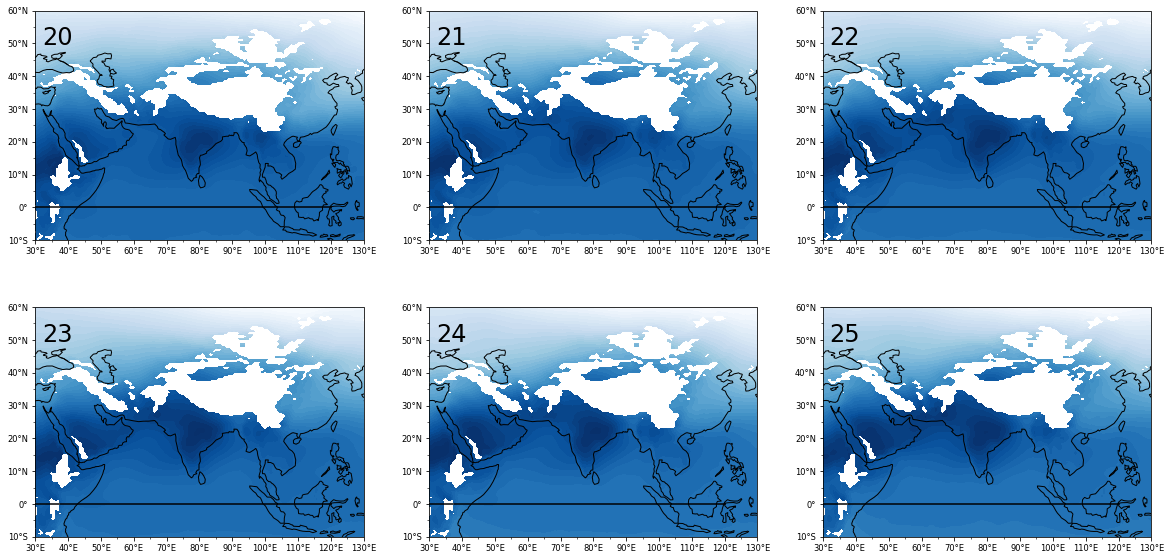

In [8]:
f    =  xr.open_dataset("/home/sun/data/merra2_climate_pentad_mse.nc").sel(lat=slice(-10,60),lon=slice(30,130),lev=850)
mse  =  f.mse.data 

'''设置绘图区域'''
lonmin,lonmax,latmin,latmax  =  30,130,-10,60
extent     =  [lonmin,lonmax,latmin,latmax]
tmin,tmax  =  20,31 

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(20,10))
spec1   =  fig1.add_gridspec(nrows=2,ncols=3)

j = 0
for row in range(2):
    for col in range(3):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
        ax.set_extent(extent, crs=proj)
        
        im  =  ax.contourf(f.lon,f.lat,f.mse.data[j+tmin,:],levels=50,cmap='Blues',alpha=1,extend='both')
        ax.plot([30,120],[0,0],color='k')

        ax.text(0.02,0.85,str(j+20),transform=ax.transAxes,fontsize=24)
    
        j += 1
